Cleaning and Filtering the Master Data File

In [34]:
# Import libraries:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
# Graph output styling from matplotlib:
plt.style.use('fivethirtyeight')

In [36]:
# Global variables:
repo_dir = os.getcwd()  # Directory of the notebook
source_data_dir = os.path.join(repo_dir, 'fbref-dw-merges')

# League ID and name mapping variables:
league_ids = ['ENG-Premier League', 'ESP-La Liga', 'FRA-Ligue 1', 'ITA-Serie A']
league_names = ['Premier League', 'La Liga', 'Ligue 1', 'Serie A']
league_names_dict = dict(zip(league_ids, league_names))

# Big teams list:
big_teams = ['Arsenal', 'Manchester City', 'Manchester Utd', 'Tottenham', 'Chelsea', 'Liverpool', 'Real Madrid', 'Barcelona', 'Atlético Madrid', 'Paris S-G', 'Juventus', 'Milan', 'Inter']

In [37]:
# Function that removes unnamed columns:
def remove_unnamed_cols(df):

    # Create list of unnamed columns:
    columns = df.columns
    unnamed_cols = [col for col in columns if "Unnamed" in col]

    # Create a new df and set index:
    new_df = (df
              .drop(columns=unnamed_cols)
              )

    return new_df


# Function that slices the master file based on an optimal playing time cutoff:
def playing_time_slice(df, cutoff : int = 8):
    return (df[df['90s_r'] >= cutoff])


# Function that adds the log(market value) column to the data:
def add_log_mkt_val_col(df):
    df['log_mkt_val'] = np.log(df['market_value_in_eur'])
    return df


# Function that adds the "Big Team" dummy variable to the data:
def add_big_team_col(df):
    df['Big Team'] = df['team'].isin(big_teams).astype(int)
    return df


# Function that adds a clean league name column based on league id:
def add_league_name_col(df):
    df['league_name'] = df['league'].map(league_names_dict)
    return df

In [4]:
# Import the master file and make a copy:
master_df = pd.read_csv(os.path.join(source_data_dir, 'master_file.csv'))
master_df_copy = master_df.copy(deep=True)
master_df_copy

,Unnamed: 0.1,Unnamed: 0,league,season,team,player_name,nationality,position,age,YOB,...,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,team_id,player_id,league_id,market_value_in_eur
0,0,0,ENG-Premier League,1718,Arsenal,Alex Oxlade-Chamberlain,ENG,DF,23.0,1993.0,...,-1.86,4.2,4.6,-0.4,-0.14,-0.74,31,143424,GB1,3.500000e+07
1,1,1,ENG-Premier League,1718,Liverpool,Alex Oxlade-Chamberlain,ENG,"MF,FW",23.0,1993.0,...,0.21,30.7,14.9,15.8,0.95,-0.14,31,143424,GB1,3.500000e+07
2,2,2,ENG-Premier League,1718,Arsenal,Granit Xhaka,SUI,MF,24.0,1992.0,...,0.04,64.4,46.9,17.5,0.48,-1.20,11,111455,GB1,4.166667e+07
3,3,3,ENG-Premier League,1718,Arsenal,Mohamed Elneny,EGY,MF,25.0,1992.0,...,0.02,16.8,12.2,4.7,0.49,-0.07,11,160438,GB1,1.000000e+07
4,4,4,ENG-Premier League,1718,Arsenal,Per Mertesacker,GER,DF,32.0,1984.0,...,-0.13,7.3,5.1,2.1,0.53,-0.01,11,6710,GB1,1.750000e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7116,1758,1758,ITA-Serie A,2223,Udinese,Roberto Pereyra,ARG,"DF,MF",31.0,1991.0,...,-0.03,37.7,42.7,-5.0,-0.16,-0.18,410,112302,IT1,6.500000e+06
7117,1759,1759,ITA-Serie A,2223,Udinese,Rodrigo Becão,BRA,DF,26.0,1996.0,...,1.02,35.2,37.7,-2.5,-0.09,0.14,410,410158,IT1,1.000000e+07
7118,1760,1760,ITA-Serie A,2223,Udinese,Simone Pafundi,ITA,"MF,FW",16.0,2006.0,...,-1.06,1.3,1.7,-0.3,-0.37,-0.24,410,876400,IT1,1.933333e+06
7119,1761,1761,ITA-Serie A,2223,Udinese,Tolgay Arslan,GER,MF,31.0,1990.0,...,-0.42,16.7,17.7,-1.1,-0.08,0.07,410,53536,IT1,2.000000e+06


Analyze matches played, 90s, and minutes played to select a cutoff point:

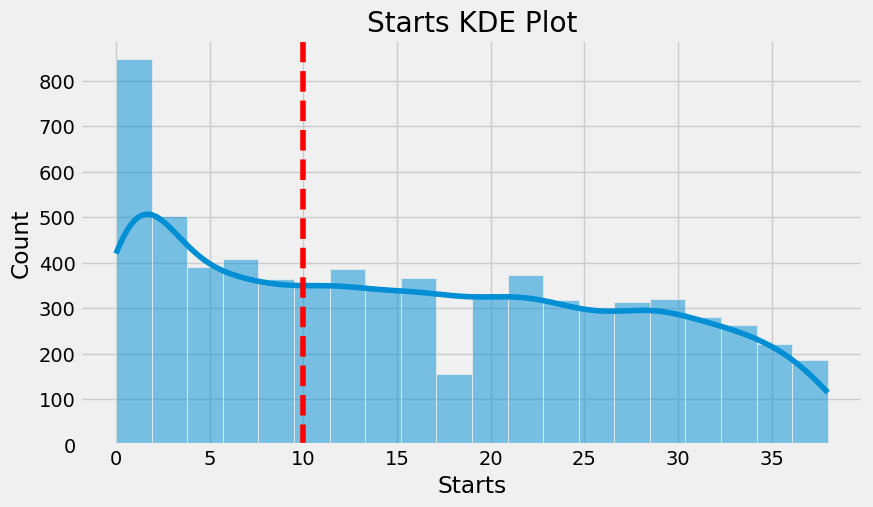

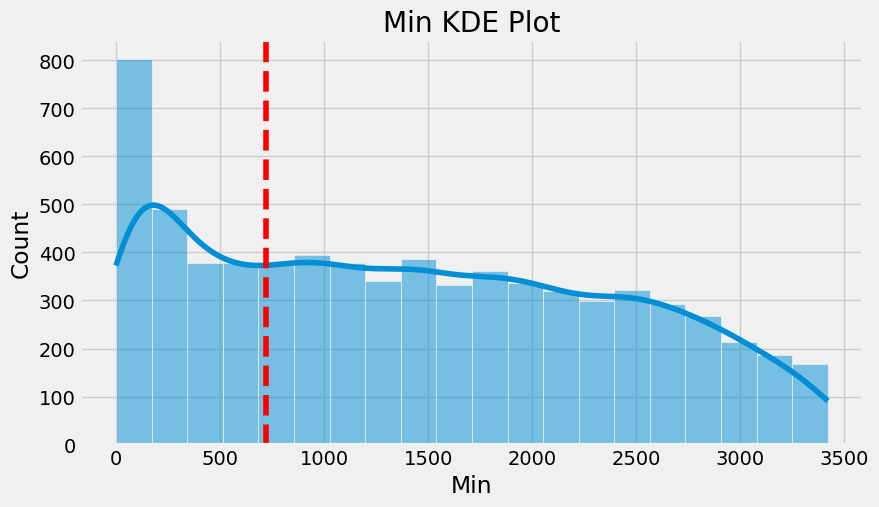

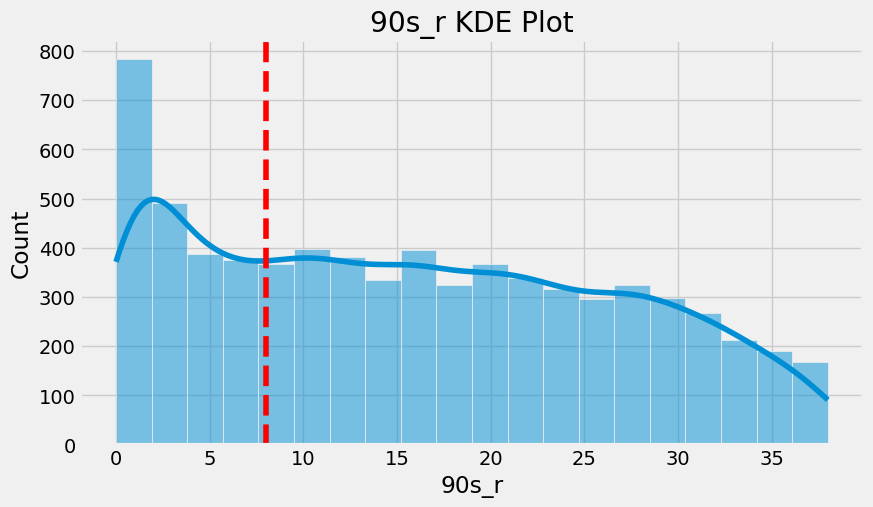

In [51]:
# Get descriptive stats on the relevant columns:
# master_df_copy['MP'].describe()
playing_time_cols = ['Starts', 'Min', '90s_r']
for col in playing_time_cols:
    plt.figure(figsize=(9,5))
    sns.histplot(data=master_df_copy, x=col, kde=True)
    plt.title(f'{col} KDE Plot')
    if col == 'Min':
        plt.axvline(x=720, color='r', linestyle='--')
        plt.show()
    elif col == '90s_r':
        plt.axvline(x=8, color='r', linestyle='--')
        plt.show()
    else:
        plt.axvline(x=10, color='r', linestyle='--')
        plt.show()

In [28]:
# Test the proposed playing time cutoff measures:
test1 = master_df_copy[master_df_copy['Starts'] >= 10]
test1_loss = ((7121 - test1.shape[0]) / 7121)*100
print(f'\nData Loss 1st from Cutoff: {test1_loss:.2f}%')

test2 = master_df_copy[master_df_copy['Min'] >= 720]
test2_loss = ((7121 - test2.shape[0]) / 7121)*100
print(f'\nData Loss 2nd from Cutoff: {test2_loss:.2f}%')

test3 = master_df_copy[master_df_copy['90s_r'] >= 8]
test3_loss = ((7121 - test3.shape[0]) / 7121)*100
print(f'\nData Loss 2nd from Cutoff: {test3_loss:.2f}%')

### CONCLUSION: WILL USE THE 90s_r >= 8 cutoff since it's associated with the least amount of data loss ###


Data Loss 1st from Cutoff: 36.72%

Data Loss 2nd from Cutoff: 31.15%

Data Loss 2nd from Cutoff: 30.98%


Test temporary cleaning/slicing measures:

In [ ]:
cleaned_master_df = remove_unnamed_cols(master_df_copy)
cleaned_master_df = playing_time_slice(cleaned_master_df)
# cleaned_master_df

Add the necessary columns to the cleaned master file:

In [38]:
cleaned_master_df = add_big_team_col(cleaned_master_df)
cleaned_master_df = add_league_name_col(cleaned_master_df)
cleaned_master_df = add_log_mkt_val_col(cleaned_master_df)

In [39]:
cleaned_master_df

,league,season,team,player_name,nationality,position,age,YOB,MP,Starts,...,xG+/-,xG+/-90,On-Off.1,team_id,player_id,league_id,market_value_in_eur,Big Team,league_name,log_mkt_val
1,ENG-Premier League,1718,Liverpool,Alex Oxlade-Chamberlain,ENG,"MF,FW",23.0,1993.0,32.0,14.0,...,15.8,0.95,-0.14,31,143424,GB1,3.500000e+07,1,Premier League,17.370859
2,ENG-Premier League,1718,Arsenal,Granit Xhaka,SUI,MF,24.0,1992.0,38.0,37.0,...,17.5,0.48,-1.20,11,111455,GB1,4.166667e+07,1,Premier League,17.545212
3,ENG-Premier League,1718,Arsenal,Mohamed Elneny,EGY,MF,25.0,1992.0,13.0,11.0,...,4.7,0.49,-0.07,11,160438,GB1,1.000000e+07,1,Premier League,16.118096
6,ENG-Premier League,1718,Arsenal,Rob Holding,ENG,DF,21.0,1995.0,12.0,9.0,...,-0.7,-0.08,-0.81,11,253341,GB1,8.666667e+06,1,Premier League,15.974995
7,ENG-Premier League,1718,Bournemouth,Adam Smith,ENG,"DF,MF",26.0,1991.0,27.0,22.0,...,-14.0,-0.61,-0.18,989,61841,GB1,5.000000e+06,0,Premier League,15.424948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,ITA-Serie A,2223,Udinese,Nehuén Pérez,ARG,DF,22.0,2000.0,34.0,33.0,...,-5.3,-0.17,-0.23,410,491693,IT1,8.000000e+06,0,Serie A,15.894952
7116,ITA-Serie A,2223,Udinese,Roberto Pereyra,ARG,"DF,MF",31.0,1991.0,34.0,33.0,...,-5.0,-0.16,-0.18,410,112302,IT1,6.500000e+06,0,Serie A,15.687313
7117,ITA-Serie A,2223,Udinese,Rodrigo Becão,BRA,DF,26.0,1996.0,28.0,28.0,...,-2.5,-0.09,0.14,410,410158,IT1,1.000000e+07,0,Serie A,16.118096
7119,ITA-Serie A,2223,Udinese,Tolgay Arslan,GER,MF,31.0,1990.0,36.0,12.0,...,-1.1,-0.08,0.07,410,53536,IT1,2.000000e+06,0,Serie A,14.508658


Fit Dummy Variables to Covariates, Other Columns:

In [ ]:
# Test the get_dummies() function with the 'league_name' variable:
league_name_dummies_df = pd.get_dummies(cleaned_master_df['league_name'], drop_first=False)
# league_name_dummies_df

# Concatenate the league name dummies to the cleaned master file:
test_concat_df = pd.concat([cleaned_master_df, league_name_dummies_df], axis=1) # axis=1 makes it a horizontal concatenation
test_concat_df

In [43]:
# Iterate the get_dummies() process over the variables of interest:
dummy_cols = ['league_name', 'team', 'season', 'nationality', 'position']

# Initialize the list of dataframes for concatenation, starting with the clean master file:
dfs_to_concat = [cleaned_master_df]

for col in dummy_cols:

    # Create the dummy variable dataframe:
    dummy_df = pd.get_dummies(cleaned_master_df[col], drop_first=False)

    # Add it to the list of dataframes to concat:
    dfs_to_concat.append(dummy_df)

# Concatenate the dataframes:
cleaned_master_with_dummies_df = pd.concat(dfs_to_concat, axis=1)
cleaned_master_with_dummies_df


,league,season,team,player_name,nationality,position,age,YOB,MP,Starts,...,DF,"DF,FW","DF,MF",FW,"FW,DF","FW,MF",GK,MF,"MF,DF","MF,FW"
1,ENG-Premier League,1718,Liverpool,Alex Oxlade-Chamberlain,ENG,"MF,FW",23.0,1993.0,32.0,14.0,...,0,0,0,0,0,0,0,0,0,1
2,ENG-Premier League,1718,Arsenal,Granit Xhaka,SUI,MF,24.0,1992.0,38.0,37.0,...,0,0,0,0,0,0,0,1,0,0
3,ENG-Premier League,1718,Arsenal,Mohamed Elneny,EGY,MF,25.0,1992.0,13.0,11.0,...,0,0,0,0,0,0,0,1,0,0
6,ENG-Premier League,1718,Arsenal,Rob Holding,ENG,DF,21.0,1995.0,12.0,9.0,...,1,0,0,0,0,0,0,0,0,0
7,ENG-Premier League,1718,Bournemouth,Adam Smith,ENG,"DF,MF",26.0,1991.0,27.0,22.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,ITA-Serie A,2223,Udinese,Nehuén Pérez,ARG,DF,22.0,2000.0,34.0,33.0,...,1,0,0,0,0,0,0,0,0,0
7116,ITA-Serie A,2223,Udinese,Roberto Pereyra,ARG,"DF,MF",31.0,1991.0,34.0,33.0,...,0,0,1,0,0,0,0,0,0,0
7117,ITA-Serie A,2223,Udinese,Rodrigo Becão,BRA,DF,26.0,1996.0,28.0,28.0,...,1,0,0,0,0,0,0,0,0,0
7119,ITA-Serie A,2223,Udinese,Tolgay Arslan,GER,MF,31.0,1990.0,36.0,12.0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
# Determine number of dummy variable categories for dimension verification:

# cleaned_master_df['nationality'].unique()

nationality_list = ['ENG', 'SUI', 'EGY', 'ISR', 'ITA', 'CMR', 'GER', 'IRL', 'SCO',
       'WAL', 'ESP', 'FRA', 'BEL', 'GHA', 'ARG', 'CIV', 'SEN', 'USA',
       'COD', 'AUT', 'NGA', 'ALG', 'JAM', 'BRA', 'NED', 'POR', 'ECU',
       'SWE', 'SVK', 'COL', 'KEN', 'PER', 'URU', 'NIR', 'NZL', 'POL',
       'ROU', 'CAN', 'GUA', 'PHI', 'SRB', 'DEN', 'GUI', 'PAR', 'NOR',
       'MEX', 'ZIM', 'CUB', 'FIN', 'GRE', 'MLI', 'UKR', 'BFA', 'MAR',
       'ANG', 'SKN', 'GAB', 'JPN', 'GRN', 'ZAM', 'VEN', 'AUS', 'CRC',
       'SVN', 'CHI', 'TOG', 'RUS', 'CPV', 'MKD', 'CRO', 'CTA', 'TUR',
       'HON', 'EQG', 'nan', 'MOZ', 'ARM', 'ALB', 'KVX', 'MNE', 'GEO', 'GNB',
       'MTN', 'BEN', 'CGO', 'HAI', 'TUN', 'RSA', 'LUX', 'MTQ', 'GLP',
       'COM', 'NCL', 'NIG', 'TRI', 'GUF', 'MAD', 'LBY', 'CZE', 'HUN',
       'EST', 'GAM', 'BIH', 'CYP', 'BUL', 'SUR', 'SLE', 'UZB']
# len(nationality_list)
# this length was equal to 108

# cleaned_master_df['team'].unique()

team_list = ['Liverpool', 'Arsenal', 'Bournemouth', 'Brighton', 'Burnley',
       'Everton', 'Chelsea', 'Crystal Palace', 'Huddersfield',
       'Leicester City', 'Southampton', 'Manchester City',
       'Manchester Utd', 'Newcastle Utd', 'Stoke City', 'Swansea City',
       'Tottenham', 'Watford', 'West Brom', 'West Ham', 'Cardiff City',
       'Fulham', 'Wolves', 'Aston Villa', 'Norwich City', 'Sheffield Utd',
       'Leeds United', 'Brentford', "Nott'ham Forest", 'Alavés',
       'Athletic Club', 'Real Sociedad', 'Leganés', 'Atlético Madrid',
       'Barcelona', 'Betis', 'Celta Vigo', 'Eibar', 'Espanyol', 'Getafe',
       'Málaga', 'Girona', 'La Coruña', 'Las Palmas', 'Levante',
       'Real Madrid', 'Sevilla', 'Valencia', 'Villarreal', 'Huesca',
       'Rayo Vallecano', 'Valladolid', 'Osasuna', 'Granada', 'Mallorca',
       'Cádiz', 'Elche', 'Almería', 'Amiens', 'Angers', 'Bordeaux',
       'Caen', 'Dijon', 'Guingamp', 'Lille', 'Lyon', 'Marseille', 'Metz',
       'Monaco', 'Paris S-G', 'Montpellier', 'Nantes', 'Nice', 'Rennes',
       'Saint-Étienne', 'Strasbourg', 'Toulouse', 'Troyes', 'Nîmes',
       'Reims', 'Brest', 'Lens', 'Lorient', 'Clermont Foot', 'Ajaccio',
       'Auxerre', 'Atalanta', 'Benevento', 'Sampdoria', 'Bologna',
       'Cagliari', 'Crotone', 'Chievo', 'Fiorentina', 'Sassuolo', 'Genoa',
       'Hellas Verona', 'Torino', 'Inter', 'Juventus', 'Lazio', 'Milan',
       'Napoli', 'Roma', 'SPAL', 'Udinese', 'Frosinone', 'Empoli',
       'Parma', 'Lecce', 'Brescia', 'Spezia', 'Salernitana', 'Venezia',
       'Cremonese', 'Monza']
# len(team_list)
# this length was equal to 116

cleaned_master_df['position'].unique()
all_positions = ['MF,FW', 'MF', 'DF', 'DF,MF', 'FW', 'FW,MF', 'GK', 'MF,DF',
       'FW,DF', 'DF,FW']
len(all_positions)
# this length was equal to 10

10